EfficientNetB1

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np

In [ ]:
model = EfficientNetB1(weights='imagenet')

32161792/32148312 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
dir = '/content/drive/MyDrive/lab2_p1/'

Загружаем изображение

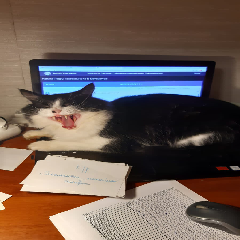

In [ ]:
img = image.load_img(dir + 'cat.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Выполняем распознование объекта

In [ ]:
preds = model.predict(x)

Печатаем 3 наиболее вероятных предсказания

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Результаты распознавания: [('n03793489', 'mouse', 0.4088167), ('n03180011', 'desktop_computer', 0.1588598), ('n03782006', 'monitor', 0.10626478)]


нормальный кот а не наш дурачок


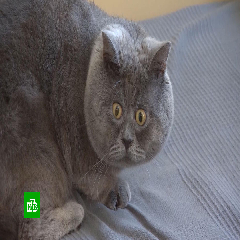

In [ ]:
img = image.load_img(dir + 'cat2.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n02123394', 'Persian_cat', 0.72968894), ('n02123159', 'tiger_cat', 0.06242375), ('n02127052', 'lynx', 0.018733138)]


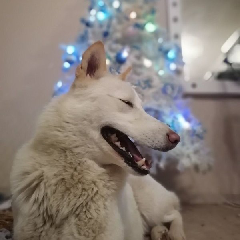

In [ ]:
img = image.load_img(dir + 'dog.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n02109961', 'Eskimo_dog', 0.43096557), ('n02110185', 'Siberian_husky', 0.2799011), ('n02114548', 'white_wolf', 0.08872257)]


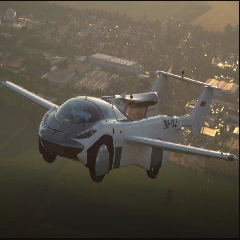

In [ ]:
img = image.load_img(dir + 'airplane.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n04552348', 'warplane', 0.7584178), ('n02687172', 'aircraft_carrier', 0.08854241), ('n04592741', 'wing', 0.037755847)]


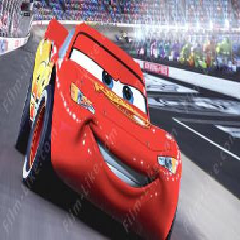

In [ ]:
img = image.load_img(dir + 'car.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n04285008', 'sports_car', 0.35264844), ('n04037443', 'racer', 0.22850192), ('n03100240', 'convertible', 0.06359982)]


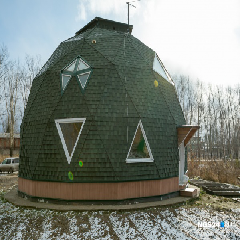

In [ ]:
img = image.load_img(dir + 'house.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n03220513', 'dome', 0.91295314), ('n03028079', 'church', 0.027561843), ('n02859443', 'boathouse', 0.020097127)]


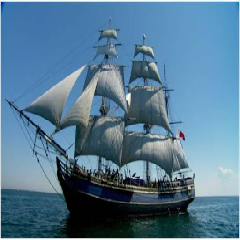

In [ ]:
img = image.load_img(dir + 'ship.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
print('Результаты распознавания:', decode_predictions(preds ,top=3)[0])

Результаты распознавания: [('n04147183', 'schooner', 0.7363362), ('n03947888', 'pirate', 0.1941606), ('n04612504', 'yawl', 0.0027308506)]


## **cats_vs_dogs**

**Подготовка данных**

Загружаем, разархивируем набор данных

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip #загружаем zip файл

--2021-12-23 10:19:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.115.40.139, 2a02:26f0:e3:3af::e59, 2a02:26f0:e3:39c::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.115.40.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   153MB/s    in 5.3s    

2021-12-23 10:19:07 (148 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
!ls

drive  kagglecatsanddogs_3367a.zip  sample_data


In [ ]:
!unzip kagglecatsanddogs_3367a.zip 

Подключаем необходимые библиотеки

In [ ]:
import shutil
import os

Задаем константы

In [ ]:
dir = '/content/drive/MyDrive/lab2_p2/'
data_dir = dir + 'PetImages';
train_dir = dir + 'train'
val_dir   = dir + 'val'
test_dir  = dir + 'test'
test_portion = 0.15
val_portion = 0.15
nb_images = 12500

Создаем каталоги для выборок

In [ ]:
def create_dir(dir_name):
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)
  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "cats"))
  os.makedirs(os.path.join(dir_name, "dogs"))

In [ ]:
create_dir(train_dir) 
create_dir(test_dir)
create_dir(val_dir)

Заполняем созданные каталоги

In [ ]:
def copy_images(st, ed, src, dst):
  for i in range(st, ed):
    shutil.copy2(os.path.join(src, "Cat/" + str(i) + ".jpg"), os.path.join(dst, "cats"))
    shutil.copy2(os.path.join(src, "Dog/" + str(i) + ".jpg"), os.path.join(dst, "dogs"))

In [ ]:
#Расчет индексов наборов данных для обучения, проверки и тестирования
start_val = int(nb_images * (val_portion))
start_tst = int(nb_images * (val_portion + test_portion))
print(nb_images)
print(start_val)
print(start_tst)

12500
1875
3750


In [ ]:
copy_images(0, start_val, data_dir, val_dir)

In [ ]:
copy_images(start_val, start_tst, data_dir, test_dir)

In [ ]:
#Копирывание изображений
copy_images(start_tst, nb_images, data_dir, train_dir)

**Перенос обучения**

Подключаем необходимые модули Keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.optimizers import Adam

Задаем константы

In [ ]:
# Размеры изображения
img_width, img_height = 240, 240
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = nb_images - start_tst
# Количество изображений для проверки
nb_validation_samples = start_val
# Количество изображений для тестирования
nb_test_samples = start_tst - start_val

Загружаем предварительно обученную нейронную сеть

In [ ]:
EfficientNetB1_net = EfficientNetB1(weights='imagenet', #предобучение на наборе данных imagenet
                                    include_top=False, #отключение полносвязного слоя
                                    input_shape=input_shape) #входные данные

EfficientNetB1_net.trainable = False #запрещения обучения сети VGG16

In [ ]:
EfficientNetB1_net.summary() #выводим модель

Создаем составную сеть

In [ ]:
model = Sequential()
model.add(EfficientNetB1_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Печатаем информацию о составной сети

In [ ]:
model.summary()

Обучаем составную сеть на новом наборе данных

In [ ]:
model.compile(loss='binary_crossentropy', #компелируем модель
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Создание генератора изображений**

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255) #Генератор делит значения всех пикселов изображения на 255

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"

 19ИВТ_Тимофеев_Е.Р._сертификаты      lab2_p1
 beans				      lab2_p2
 bezos				      PetImages
 BostonHousing.csv		      scratch_detection
'Colab Notebooks'		      train.csv
'How to get started with Drive.pdf'  'Егор презентация.pptx'
'huawei documentation'		     'Лабы по инфе.rar'
 inpainting			      Техпроэкт.rar
 kagglecatsanddogs_3367a.zip


In [ ]:
dir = "/content/drive/MyDrive/laba2_p2"

In [ ]:
#Генератор данных для обучения на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 17457 images belonging to 2 classes.


In [ ]:
#Генератор данных для проверки на основе изображений из каталога
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3746 images belonging to 2 classes.


In [ ]:
#Генератор данных для тестирования на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3741 images belonging to 2 classes.


Проверяем данные

In [ ]:
import glob
from PIL import Image


In [ ]:
def delete_incorrect_format(path):
  images = glob.glob(path + "*.jpg")

  for image in images:
    with open(image, 'rb') as file:
      #path = os.path.join(os.path.abspath(os.path.dirname(__file__)), 'test.txt')
      
      im = Image.open(file)
      print(image, im.width, im.height, im.mode, im.format, type(im))
      if ( (im.mode != 'RGB') and (im.format != 'JPEG') ):
        os.remove(image);

In [ ]:
delete_incorrect_format(train_dir+ "/cats/")
delete_incorrect_format(train_dir+ "/dogs/")
delete_incorrect_format(val_dir+ "/cats/")
delete_incorrect_format(val_dir+ "/dogs/")
delete_incorrect_format(test_dir+ "/cats/")
delete_incorrect_format(test_dir+ "/dogs/")

In [ ]:
nb_train_samples = len(glob.glob(train_dir+ "/cats/*")) + len(glob.glob(train_dir+ "/dogs/*"))
# Количество изображений для проверки
nb_validation_samples = len(glob.glob(val_dir+ "/cats/*")) + len(glob.glob(val_dir+ "/dogs/*"))
# Количество изображений для тестирования
nb_test_samples = len(glob.glob(test_dir+ "/cats/*")) + len(glob.glob(test_dir+ "/dogs/*"))
nb_train_samples



17457

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
catimg = image.load_img('/content/drive/MyDrive/lab2_p1/cat2.jpg', target_size=(240, 240))

In [ ]:
dogimg = image.load_img('/content/drive/MyDrive/lab2_p1/dog.jpg', target_size=(240, 240))

In [ ]:
def add_empty_photo(path):
  count =0
  for i in range(0, start_val):
    if (os.path.exists(path+"val/cats/" + i + ".jpg") != True):
      write(path+"val/cats/" + i + ".jpg", catimg)
    if (os.path.exists(path+"val/dogs/" + i + ".jpg") != True):
      write(path+"val/dogs/" + i + ".jpg", dogimg)

  for i in range(start_val, start_test):
    if (os.path.exists(path+"test/cats/" + i + ".jpg") != True):
      write(path+"test/cats/" + i + ".jpg", catimg)
    if (os.path.exists(path+"test/dogs/" + i + ".jpg") != True):
      write(path+"test/dogs/" + i + ".jpg", dogimg)
    
  for i in range(start_test, nb_images):
    if (os.path.exists(path+"train/cats/" + i + ".jpg") != True):
      write(path+"train/cats/" + i + ".jpg", catimg)
    if (os.path.exists(path+"train/dogs/" + i + ".jpg") != True):
      write(path+"train/dogs/" + i + ".jpg", dogimg)

In [ ]:
add_empty_photo(dir)

NameError: ignored

**Обучаем сеть с использованием генераторов**

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
 23/136 [====>.........................] - ETA: 19:28 - loss: 0.7503 - accuracy: 0.4952

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

136/136 [==============================] - 1621s 12s/step - loss: 0.7096 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 2/5
136/136 [==============================] - 784s 6s/step - loss: 0.6953 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.4952
Epoch 3/5
136/136 [==============================] - 437s 3s/step - loss: 0.6938 - accuracy: 0.4928 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 4/5
136/136 [==============================] - 234s 2s/step - loss: 0.6934 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 5/5
136/136 [==============================] - 148s 1s/step - loss: 0.6933 - accuracy: 0.4919 - val_loss: 0.6931 - val_accuracy: 0.4995


Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Аккуратность на тестовых данных: 51.45%


Проверка обученной сети

Кошка

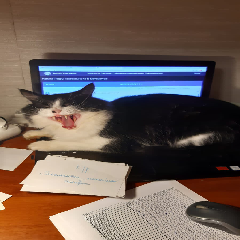

In [ ]:
img = image.load_img('/content/drive/MyDrive/lab2_p1/cat.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
threshold = 0.5

In [ ]:
    if preds >= threshold:
        pred ="Cat"
    else:
        pred="Dog"

In [ ]:
preds

In [ ]:
print('Результаты распознавания:', pred)

Результаты распознавания: Cat


Собака

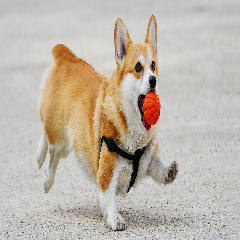

In [ ]:
img = image.load_img('/content/drive/MyDrive/lab2_p1/dog2.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
    if preds >= threshold:
        pred ="Cat"
    else:
        pred="Dog"

In [ ]:
print('Результаты распознавания:', pred)

Результаты распознавания: Dog


## **horses_or_humans**

**Подготовка данных**

Загружаем набор данных

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

--2021-12-23 19:22:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   208MB/s    in 0.7s    

2021-12-23 19:22:16 (208 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-12-23 19:22:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-12-23 19:22:21 (123 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



Разархивируем наборы даннных

In [ ]:
!unzip horse-or-human.zip

In [ ]:
!unzip validation-horse-or-human.zip

Создаем каталог для изображений 

In [ ]:
!mkdir HoH

In [ ]:
!cp -r /content/horses /content/HoH/horses

In [ ]:
!cp -r /content/humans /content/HoH/humans

In [ ]:
!ls /content/HoH/humans

In [ ]:
!ls /content/HoH/horses 

Подключаем необходимые библиотеки

In [ ]:
import shutil
import os

Задаем константы

In [ ]:
data_dir = '/content/HoH/'
train_dir = 'train'
val_dir   = 'val'
test_dir  = 'test'
test_portion = 0.15
val_portion = 0.15
nb_images = 628

Создаем каталоги для выборок

In [ ]:
def create_dir(dir_name): #Функция создания каталога с двумя подкаталогами по на названию классов:cats_vs_dogs
  
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)

  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "horses"))
  os.makedirs(os.path.join(dir_name, "humans"))

In [ ]:
#Создаем структуры каталогов для обучающего, проверочного и тестового набора данных
create_dir(train_dir) 
create_dir(test_dir)
create_dir(val_dir)

Переименовываем изображения

In [ ]:
i = 0
for filename in os.listdir("/content/HoH/horses"):
  os.rename(f"/content/HoH/horses/{filename}",f"/content/HoH/horses/horse{i}.png")
  i+=1
print(i) 

628


In [ ]:
!ls /content/HoH/horses 

In [ ]:
i = 0
for filename in os.listdir("/content/HoH/humans"):
  os.rename(f"/content/HoH/humans/{filename}",f"/content/HoH/humans/human{i}.png")
  i+=1
print(i) 

655


In [ ]:
!ls /content/HoH/humans 

Заполняем созданные каталоги

In [ ]:
#Функция копирывания изображений в заданный каталог
def copy_images(st, ed, src, dst):
  for i in range(st, ed):
    shutil.copy2(os.path.join(src, "horses/horse" + str(i) + ".png"), os.path.join(dst, "horses"))
    shutil.copy2(os.path.join(src, "humans/human" + str(i) + ".png"), os.path.join(dst, "humans"))

In [ ]:
#Расчет индексов наборов данных для обучения, проверки и тестирования
start_val = int(nb_images * (1 - val_portion - test_portion))
start_tst = int(nb_images * (1 - test_portion))
print(start_val)
print(start_tst)

439
533


In [ ]:
#Копирывание изображений
copy_images(0, start_val, data_dir, train_dir)

In [ ]:
copy_images(start_val, start_tst, data_dir, val_dir)

In [ ]:
copy_images(start_tst, nb_images, data_dir, test_dir)

**Перенос обучения**

Подключаем необходимые модули Keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.optimizers import Adam

Задаем константы

In [ ]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
img_width, img_height = 240, 240
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 878
# Количество изображений для проверки
nb_validation_samples = 188
# Количество изображений для тестирования
nb_test_samples = 190

Загружаем предварительно обученную нейронную сеть

In [ ]:
EfficientNetB1_net = EfficientNetB1(weights='imagenet', #предобучение на наборе данных imagenet
                                    include_top=False, #отключение полносвязного слоя
                                    input_shape=input_shape) #входные данные

EfficientNetB1_net.trainable = False #запрещения обучения сети VGG16

In [ ]:
EfficientNetB1_net.summary() #выводим модель

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 240, 240, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 240, 240, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                     

Создаем составную сеть

In [ ]:
model = Sequential()
model.add(EfficientNetB1_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Печатаем информацию о составной сети

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 8, 8, 1280)       6575239   
                                                                 
 flatten_1 (Flatten)         (None, 81920)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               20971776  
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_3 (Activation)   (None, 1)                

Обучаем составную сеть на новом наборе данных

In [ ]:
model.compile(loss='binary_crossentropy', #компелируем модель
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255) #Генератор делит значения всех пикселов изображения на 255

In [ ]:
#Генератор данных для обучения на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 878 images belonging to 2 classes.


In [ ]:
#Генератор данных для проверки на основе изображений из каталога
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 188 images belonging to 2 classes.


In [ ]:
#Генератор данных для тестирования на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 190 images belonging to 2 classes.


Проверяем данные

In [ ]:
import glob
from PIL import Image

images = glob.glob("/content/val/humans/*.jpg")

for image in images:
    with open(image, 'rb') as file:
        im = Image.open(file)
        print(image, im.width, im.height, im.mode, im.format, type(im))
#Ошибок не выдало        

**Обучаем сеть с использованием генераторов**

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
13/13 [==============================] - 21s 871ms/step - loss: 0.8243 - accuracy: 0.5074 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 2/5
13/13 [==============================] - 8s 580ms/step - loss: 0.7473 - accuracy: 0.5123 - val_loss: 0.6932 - val_accuracy: 0.4766
Epoch 3/5
13/13 [==============================] - 8s 574ms/step - loss: 0.7422 - accuracy: 0.5024 - val_loss: 0.6998 - val_accuracy: 0.5156
Epoch 4/5
13/13 [==============================] - 8s 568ms/step - loss: 0.7160 - accuracy: 0.4840 - val_loss: 0.6997 - val_accuracy: 0.4922
Epoch 5/5
13/13 [==============================] - 8s 575ms/step - loss: 0.7107 - accuracy: 0.5111 - val_loss: 0.6949 - val_accuracy: 0.5078


Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Аккуратность на тестовых данных: 49.22%


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Проверка обученной сети

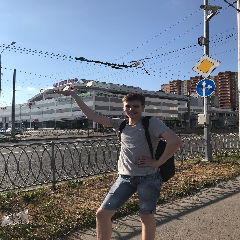

In [ ]:
img = image.load_img('/content/drive/MyDrive/lab2_p1/human2.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
preds

array([[0.01509901]], dtype=float32)

In [ ]:
threshold = 0.5

In [ ]:
    if preds <= threshold:
        pred ="Human"
    else:
        pred="Horse"

In [ ]:
print('Результаты распознавания:', pred)

Результаты распознавания: Human


In [ ]:
!ls /content/drive/MyDrive/lab2_p1

1.jpg	      car.jpg	cat.jpg   dog.jpg     horse.png  human2.jpg
airplane.jpg  cat2.jpg	dog2.jpg  horse2.jpg  house.jpg  ship.jpg


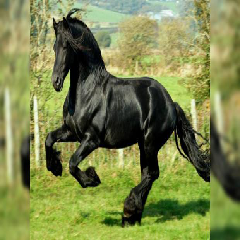

In [ ]:
img = image.load_img('/content/drive/MyDrive/lab2_p1/horse2.jpg', target_size=(240, 240))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

In [ ]:
preds

array([[0.87395865]], dtype=float32)

In [ ]:
threshold = 0.5

In [ ]:
    if preds <= threshold:
        pred ="Human"
    else:
        pred="Horse"

In [ ]:
print('Результаты распознавания:', pred)

Результаты распознавания: Horse
